Electricity Load Forecasting using ARIMA Model  
Dataset containing data From - 7-12-2020 to 20-12-2020 

In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 13.0MB/s 
     |████████████████████████████████| 9.5MB 44.9MB/s 
     |████████████████████████████████| 2.1MB 56.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


Load the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
Dataset = pd.read_excel("/content/drive/MyDrive/Colab_files/Train_20201207.xlsx")
Dataset.to_csv('train_20201207.csv')
Dataset.head()

# We copy the dataset such that we do not loose the original dataset
Original_Dataset = Dataset.copy()
Original_Dataset.head()


Mounted at /content/drive


,Time,Date,NEM Demand(Actual)
0,00:30,2020-12-07,5484.1
1,01:00,2020-12-07,5366.4
2,01:30,2020-12-07,5282.0
3,02:00,2020-12-07,5201.6
4,02:30,2020-12-07,5155.9


Clean the data

In [4]:
Dataset.isna().sum()   #No unknown values

Time                  0
Date                  0
NEM Demand(Actual)    0
dtype: int64

In [5]:
Dataset ['DateTime'] = Dataset['Date'].astype(str) + " "+ Dataset['Time'].astype(str)
Dataset.tail()
Dataset ['Date'] = pd.to_datetime(Dataset['Date'], format = '%Y-%m-%d')
Dataset.tail()
Dataset ['DateTime'] = pd.to_datetime(Dataset['DateTime'], format = '%Y-%m-%d %H:%M:%S')
Dataset.tail()
Dataset.dtypes
Dataset.tail()


,Time,Date,NEM Demand(Actual),DateTime
667,22:00,2020-12-20,5901.6,2020-12-20 22:00:00
668,22:30,2020-12-20,5765.2,2020-12-20 22:30:00
669,23:00,2020-12-20,5683.3,2020-12-20 23:00:00
670,23:30,2020-12-20,5563.0,2020-12-20 23:30:00
671,00:00,2020-12-20,5470.2,2020-12-20 00:00:00


DateTime
2020-12-07 00:30:00    5484.1
2020-12-07 01:00:00    5366.4
2020-12-07 01:30:00    5282.0
2020-12-07 02:00:00    5201.6
2020-12-07 02:30:00    5155.9
Name: NEM Demand(Actual), dtype: float64


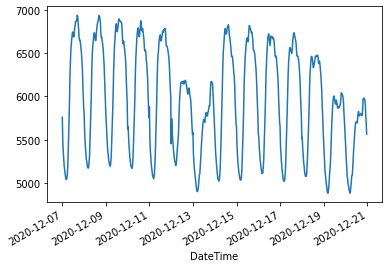

In [6]:
plot_features = Dataset['NEM Demand(Actual)']
plot_features.index = Dataset['DateTime']
_= plot_features.plot(subplots = True)
print(plot_features.head())

In [7]:
Dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NEM Demand(Actual),672.0,5971.323661,609.974163,4877.7,5383.2,5980.1,6554.125,6942.8


Do not loose the original dataset

In [8]:
Dataset_actual = Dataset

In [9]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(Dataset_actual['NEM Demand(Actual)'])
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  1.3447242817010298e-09  if above 0.05, data is not stationary


Above result shows that time series is stationary

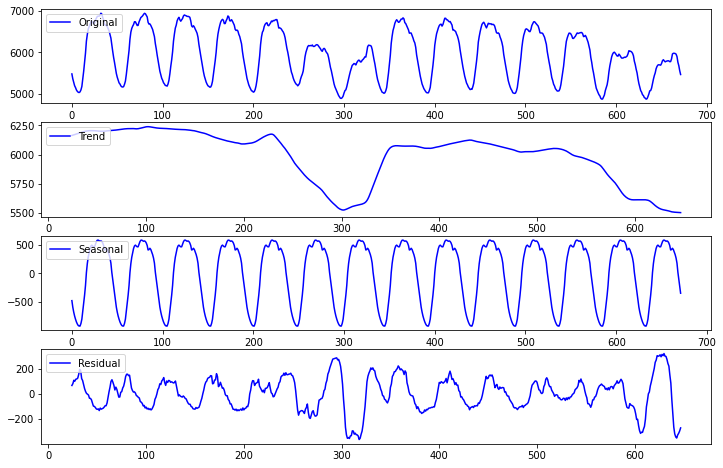

In [10]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(Dataset_actual['NEM Demand(Actual)'],  
                            model ='additive', period = 48)

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(Dataset_actual['NEM Demand(Actual)'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.show()

In [11]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(Dataset_actual['NEM Demand(Actual)'], start_p = 1, d=1, start_q = 1, 
                          max_p = 3, max_q = 3, max_d=3, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=3, max_D=3, max_Q=3,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=25)  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=7158.724, Time=0.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8346.208, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7042.884, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7157.465, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6927.226, Time=1.45 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=inf, Time=6.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=6363.243, Time=8.74 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=6344.521, Time=20.73 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=9.10 sec
 ARIMA(1,1,0)(3,1,3)[12]             : AIC=inf, Time=29.27 sec
 ARIMA(1,1,0)(2,1,3)[12]             : AIC=inf, Time=26.43 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=6594.455

In [12]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.
# Model: SARIMAX(2, 1, 0)x(3, 1, [1,2], 12)

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  672
Model:             SARIMAX(2, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood               -3142.002
Date:                                 Tue, 05 Jan 2021   AIC                           6300.004
Time:                                         08:11:35   BIC                           6335.930
Sample:                                              0   HQIC                          6313.930
                                                 - 672                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4793      0.035     13.570      0.000       0.410       0

In [13]:
#Split data into train and test
size = int(len(Dataset_actual) * 0.66)
X_train, X_test = Dataset_actual[0:size], Dataset_actual[size:len(Dataset_actual)]


In [17]:
# Fit a SARIMAX(2, 1, 0)x(3, 1, [1,2,3], 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(X_train['NEM Demand(Actual)'],  
                order = (2, 1, 0),  
                seasonal_order =(3, 1, [1,2], 12)) 
  
result = model.fit() 
result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                      NEM Demand(Actual)   No. Observations:                  443
Model:             SARIMAX(2, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood               -2089.532
Date:                                 Tue, 05 Jan 2021   AIC                           4195.065
Time:                                         08:26:12   BIC                           4227.575
Sample:                                              0   HQIC                          4207.902
                                                 - 443                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5598      0.047     11.865      0.000       0.467       0.652
ar.L2          0.2364      0.049      4.791      0.000       0.140       0.333
ar.S.L12      -0.9871      0.043    -22.763      0.000      -1.072      -0.902
ar.S.L24      -0.7047      0.052    -13.598      0.000      -0.806      -0.603
ar.S.L36      -0.7107      0.031    -23.202      0.000      -0.771      -0.651
ma.S.L12       0.1059      0.038      2.790      0.005       0.032       0.180
ma.S.L24      -0.7014      0.039    -17.805      0.000      -0.779      -0.624
sigma2       837.1372     53.207     15.734      0.000     732.854     941.420
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.59
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                            -0.09
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

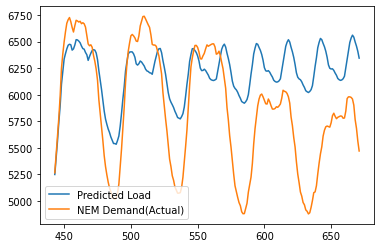

In [18]:
#Train prediction
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 

#Prediction
start_index = len(X_train)
end_index = len(Dataset_actual)-1
prediction = result.predict(start_index, end_index).rename('Predicted Load') 
#Rename the column

# plot predictions and actual values 
prediction.plot(legend = True) 
X_test['NEM Demand(Actual)'].plot(legend = True) 


In [19]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train['NEM Demand(Actual)'], train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test['NEM Demand(Actual)'], prediction))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 289.98 RMSE
Test Score: 556.55 RMSE
